In [19]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('BigMartDataSales.txt')
data = df.head(1000)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Item_Identifier              1000 non-null object
Item_Weight                  814 non-null float64
Item_Fat_Content             1000 non-null object
Item_Visibility              1000 non-null float64
Item_Type                    1000 non-null object
Item_MRP                     1000 non-null float64
Outlet_Identifier            1000 non-null object
Outlet_Establishment_Year    1000 non-null int64
Outlet_Size                  716 non-null object
Outlet_Location_Type         1000 non-null object
Outlet_Type                  1000 non-null object
Item_Outlet_Sales            1000 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 93.8+ KB


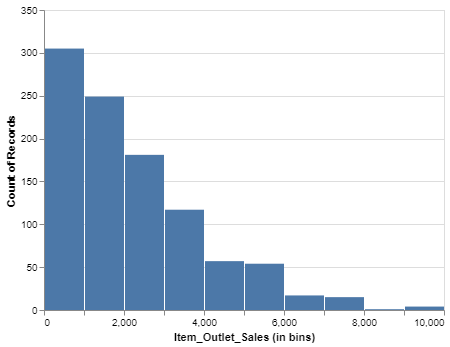

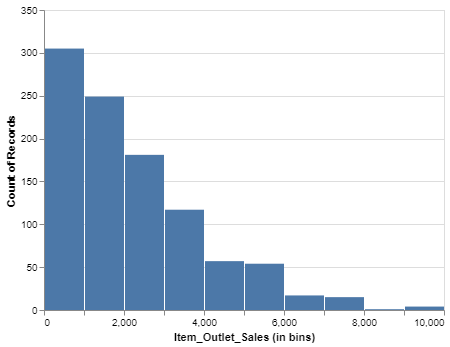

In [12]:
alt.Chart(data).mark_bar().encode(
 alt.X('Item_Outlet_Sales',bin=True,axis= alt.Axis(title='Item_Outlet_Sales (in bins)')),
 alt.Y('count(*):Q')
)

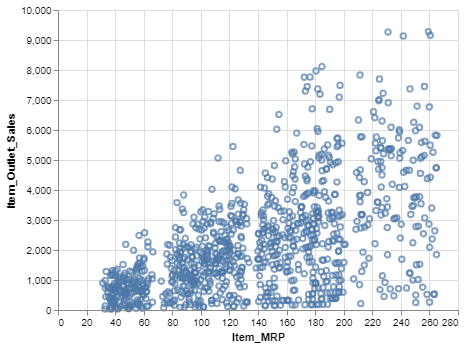

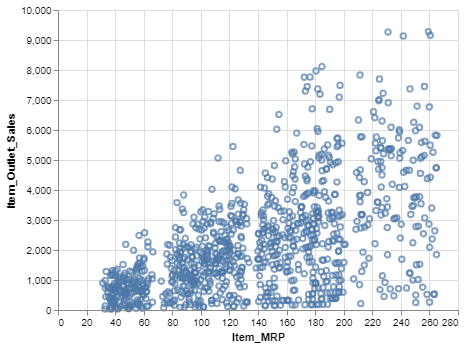

In [14]:
alt.Chart(data).mark_point().encode(
 x='Item_MRP',
 y='Item_Outlet_Sales',
)

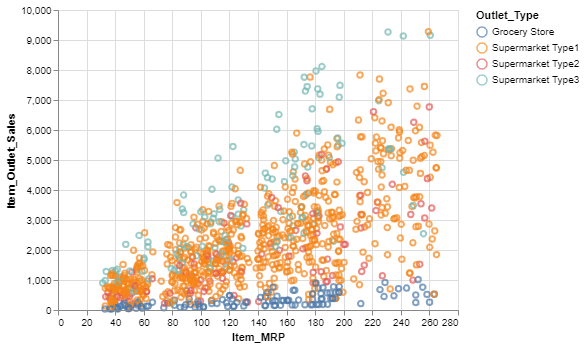

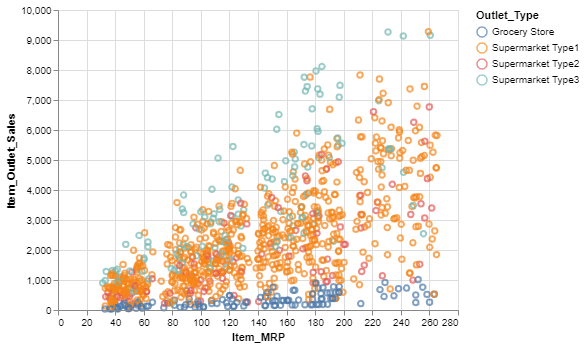

In [15]:
alt.Chart(data).mark_point().encode(
 x='Item_MRP',
 y='Item_Outlet_Sales',
 color='Outlet_Type'   
)

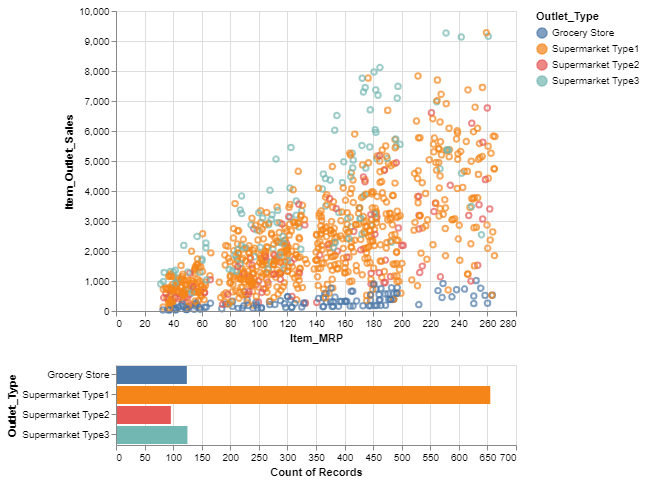

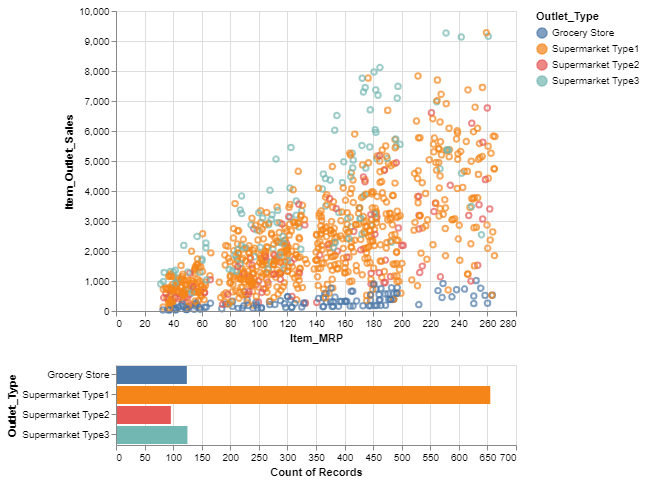

In [16]:
brush = alt.selection(type='interval')

points = alt.Chart(data).mark_point().encode(
    x='Item_MRP:Q',
    y='Item_Outlet_Sales:Q',
    color=alt.condition(brush, 'Outlet_Type:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(data).mark_bar().encode(
    y='Outlet_Type:N',
    color='Outlet_Type:N',
    x='count(Outlet_Type):Q'
).transform_filter(
    brush
)

points & bars